<a href="https://colab.research.google.com/github/ludo950/data-science-classification/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Bank Marketing/bank.csv')

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [4]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


we will create a copy called df of the original df1 dataset.

In [5]:
df=df1.copy()

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There no missing values and there are a lot of categorical features in the data. They will be analyzed first and then encoded before the ML training.

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Some first insights on the data:<br>
**Age:<br>**
the medium age is 41 years old.
the minimum age is 18 years old.
the maximum age is 95 years old.
<br>
**Balance:<br>**
The std deviation looks high (3225) compared to the mean (1528).<br>
<br>
Housing and deposit look balanced as their mean value is close to 0.5
<br>
From the column 'previous' we can see that most of the clients have been already contacted, since the value is close to 1 (0.8325)

As written in the dataset description, the duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [9]:
df=df.drop('duration', axis=1)

# Exploratory Data Analysis

To allow a better visualization, different palette will be chosen for the following plots.

In [58]:
palette = {'yes':'red', 'no':'green'}

We will analyze the relationship between the categorical features and the target variable, which is 'deposit'

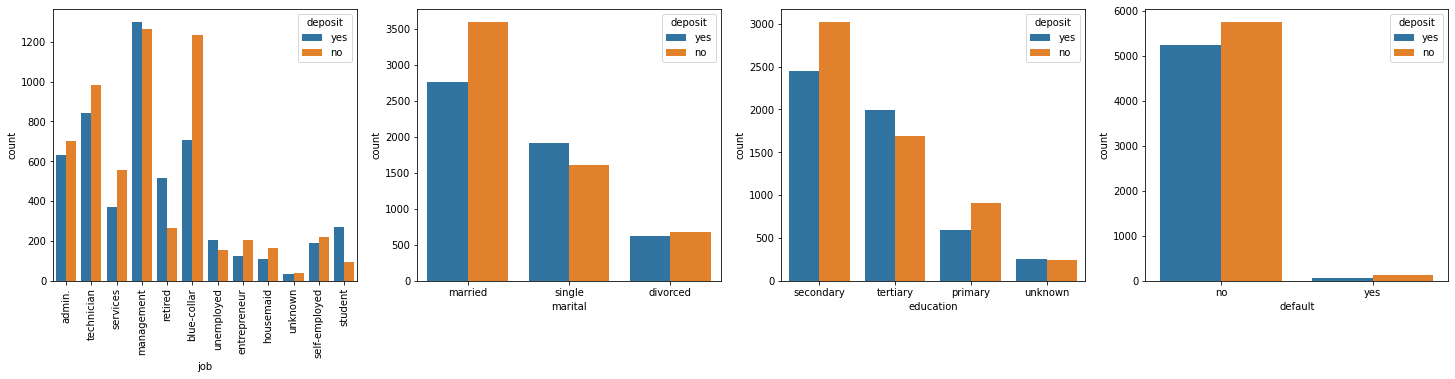

In [61]:
fig, axs =plt.subplots(1,4,figsize=(25, 5));
sns.countplot(x= 'job', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'marital', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'education', hue = 'deposit', data=df, ax=axs[2]);
sns.countplot(x= 'default', hue = 'deposit', data=df, ax=axs[3]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

From this plot we can say:<br>
**Job:**
*   The majority of retired clients or students accepted the deposit
*   The majority of blue collars refused the deposit

**Marital status:**

*   Most of married clients refused the deposit
*   Single clients tended to accept the deposit

**Education:**

*   Clients with a lower education (secondary and primary) tended to refuse the deposit
*   Clients with higher education ('tertiary') tended to accept the offer





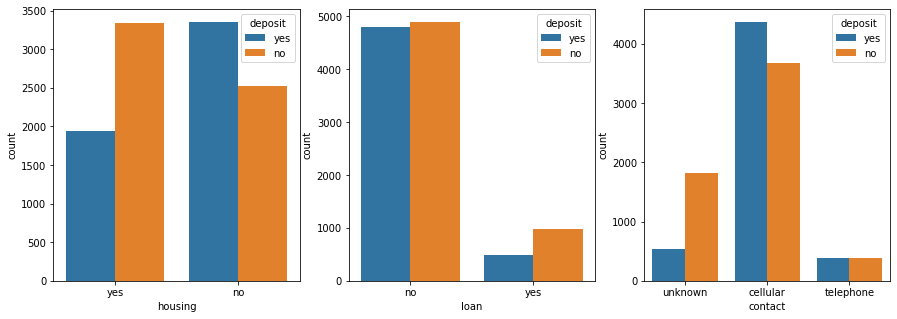

In [11]:
fig, axs =plt.subplots(1,3,figsize=(15, 5));
sns.countplot(x= 'housing', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'loan', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'contact', hue = 'deposit', data=df, ax=axs[2]);

From this plot we can say:<br>
**Housing (Loan) and (Personal) Loan:**
*   Clients without a loan tended to accept the deposit compared to clients with a loan

**Marital status:**

*   Most of married clients refused the deposit
*   Single clients tended to accept the deposit

**Contact:**

*   Clients with a cellular phone tended to accept the deposit. This could be related to the status and/or the balance.

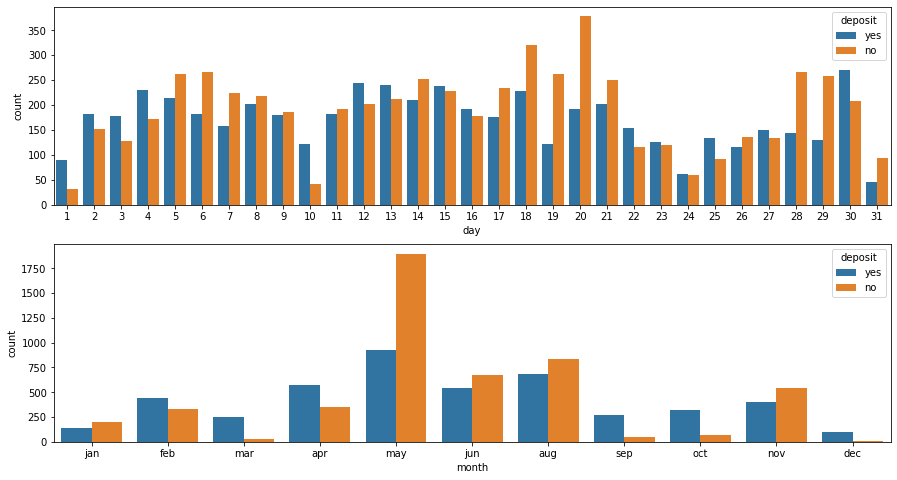

In [12]:
fig, axs =plt.subplots(2,1,figsize=(15, 8));
sns.countplot(x= 'day', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'month', hue = 'deposit', data=df, ax=axs[1], order=['jan','feb','mar','apr','may','jun','aug','sep','oct','nov','dec']);

There is not a clear pattern when alazying the deposit acceptance by day. <br>
However, for what concerna the month plot instead:

*   The majority of data regards the month of 'may'.
*   In the months of March, april, september, october and december most of the clients accepted the deposit.


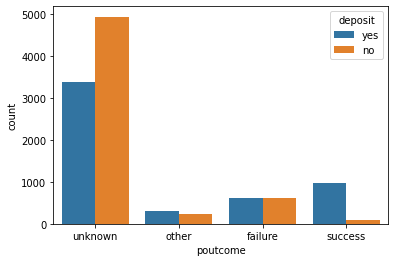

In [13]:
plt.figsize=(10, 10);
sns.countplot(x= 'poutcome', hue = 'deposit', data=df);

We can see that people who previously accepted the deposit tended to accept new offers.

## General insights from the data

Relationship between age and education:

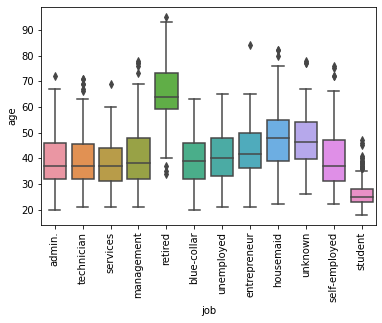

In [14]:
ax = sns.boxplot(x='job', y='age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

As expected we can see that retired people tends to be older.

Relationship between balance and age, 

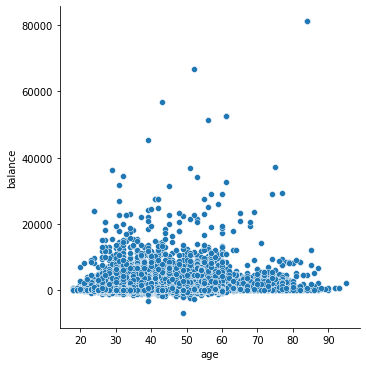

In [15]:
ax = sns.relplot(x='age', y='balance', data=df)

This plot looks messy, we will create a categorical column for 'age'. Moreover, it could be a good idea to use a log transformation for the balance column.

In [16]:
df['age_cate'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['young', 'middle-age', 'older', ' old'])

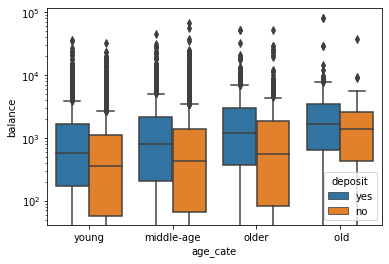

In [17]:
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df)
plt.yscale('log')

From this plot we can see that older people tends to have a higher bank balance and that people who accepted the deposit tends to have a higher balance compared to the clients who refused the deposit.

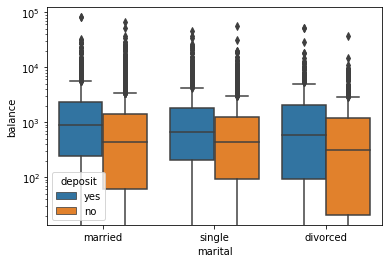

In [18]:
sns.boxplot(x='marital', y='balance', hue='deposit', data=df)
plt.yscale('log')

From this plot we can see that the distribution of divorced clients has a quite large IQR compared to married and single clients. This means that divorced clients have on average lower bank balance and have a quite high variance.

In [19]:
df=df.drop('age_cate', axis=1)

# Data Preparation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


Before creating the ML model, we need to prepare the data such as encode categorical features etc...

In [21]:
encoded_df=df.copy()

We create a copy of the the dataset where operations such as encodings will be performed.

In [22]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [23]:
encoded_df['default']=encoded_df['default'].map({'yes':1,'no':0})
encoded_df['housing']=encoded_df['housing'].map({'yes':1,'no':0})
encoded_df['loan']=encoded_df['loan'].map({'yes':1,'no':0})
encoded_df['deposit']=encoded_df['deposit'].map({'yes':1,'no':0})

The categorical columns containg binary values such as yes and no will be binary encoded by 1 and 0.<br>
Next, the remaining categorical columns will be encoded by one hot encoding/get_dummies to get a more robust encoding compared to a Label encoding by integer numbers.

In [25]:
cat_feat = encoded_df.select_dtypes(include="object").columns

In [26]:
cat_feat

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

These categorical featurs will be encoded by one hot encoding.

In [66]:
encoded_df2 = pd.get_dummies(encoded_df, drop_first=True)

In [67]:
encoded_df2.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [68]:
X = encoded_df2.drop('deposit', axis=1)
y = encoded_df2['deposit']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [70]:
y_train.sum()

3706

In [71]:
y_test.sum()

1583

In [99]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

In [100]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [198]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)          

## KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [200]:
param_grid={'n_neighbors' : np.arange(1,30),
             'weights' : ['uniform', 'distance'],
             'metric' : ['euclidean', 'manhattan','minkowski']
             } 

In [201]:
knn_model= RandomizedSearchCV(estimator = KNeighborsClassifier(),
                      param_distributions = param_grid,
                      scoring='roc_auc',
                      cv = 10,
                      n_jobs=-1)

In [202]:
knn_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refi

In [203]:
knn_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 28, 'weights': 'uniform'}

In [204]:
knn_model.best_score_

0.7546551733946973

In [205]:
y_pred_knn = knn_model.predict(X_test)

In [206]:
conf_matrix_knn=confusion_matrix(y_pred_knn,y_test)
conf_matrix_knn

array([[1468,  692],
       [ 298,  891]])

In [207]:
classification_report(y_pred_knn,y_test)

'              precision    recall  f1-score   support\n\n           0       0.83      0.68      0.75      2160\n           1       0.56      0.75      0.64      1189\n\n    accuracy                           0.70      3349\n   macro avg       0.70      0.71      0.70      3349\nweighted avg       0.74      0.70      0.71      3349\n'

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2026
           1       0.61      0.73      0.66      1323

*       accuracy                           0.71      3349
*      macro avg       0.70      0.71      0.70      3349
*   weighted avg       0.72      0.71      0.71      3349


# Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [210]:
lr_model = RandomizedSearchCV(estimator = LogisticRegression(),
                           param_distributions = param_grid, 
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs=-1
                           )

In [211]:
lr_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700],
           

In [212]:
lr_model.best_score_

0.6983240058813706

In [213]:
y_pred_lr = lr_model.predict(X_test)

In [214]:
confusion_matrix(y_test, y_pred_lr)

array([[1444,  322],
       [ 681,  902]])

In [215]:
classification_report(y_test, y_pred_lr)

'              precision    recall  f1-score   support\n\n           0       0.68      0.82      0.74      1766\n           1       0.74      0.57      0.64      1583\n\n    accuracy                           0.70      3349\n   macro avg       0.71      0.69      0.69      3349\nweighted avg       0.71      0.70      0.70      3349\n'

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1766
           1       0.74      0.58      0.65      1583

*    accuracy                           0.70      3349 
*      macro avg       0.71      0.70      0.70      3349
*   weighted avg       0.71      0.70      0.70      3349




# Random forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [218]:
rfc = RandomForestClassifier()

In [219]:
from sklearn.model_selection import RandomizedSearchCV
rfc_model = RandomizedSearchCV(estimator=rfc, 
                            param_distributions=param_grid,
                            cv= 10,
                            n_jobs=-1)
rfc_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [220]:
rfc_model.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [221]:
y_pred_rfc = rfc_model.predict(X_test)

In [222]:
rfc_model.best_score_

0.7260959619610245

In [223]:
confusion_matrix(y_test, y_pred_rfc)

array([[1491,  275],
       [ 613,  970]])

In [224]:
classification_report(y_test, y_pred_rfc)

'              precision    recall  f1-score   support\n\n           0       0.71      0.84      0.77      1766\n           1       0.78      0.61      0.69      1583\n\n    accuracy                           0.73      3349\n   macro avg       0.74      0.73      0.73      3349\nweighted avg       0.74      0.73      0.73      3349\n'

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1766
           1       0.77      0.61      0.68      1583

    accuracy                           0.73      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.73      0.73      3349


# XGBOOST

In [226]:
import xgboost as xgb

In [227]:
# Create the parameter grid
param_grid = {
    'learning_rate': np.arange(0.01, 0.5, 0.001),
    'max_depth': np.arange(3, 30, 2),
    'n_estimators': np.arange(10, 200, 10)
}

In [228]:
xgb_model = xgb.XGBClassifier()

In [229]:
from sklearn.model_selection import RandomizedSearchCV
rand_neg_mse = RandomizedSearchCV(estimator=xgb_model, 
                                  param_distributions=param_grid, 
                                  cv=10)

In [230]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [231]:
y_pred_xgb = xgb_model.predict(X_test)

In [232]:
confusion_matrix(y_pred_xgb,y_test)

array([[1503,  622],
       [ 263,  961]])

In [233]:
classification_report(y_pred_xgb,y_test)

'              precision    recall  f1-score   support\n\n           0       0.85      0.71      0.77      2125\n           1       0.61      0.79      0.68      1224\n\n    accuracy                           0.74      3349\n   macro avg       0.73      0.75      0.73      3349\nweighted avg       0.76      0.74      0.74      3349\n'

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2125
           1       0.61      0.79      0.68      1224

*       accuracy                           0.74      3349
*     macro avg       0.73      0.75      0.73      3349
*    weighted avg       0.76      0.74      0.74      3349


# Results comparison

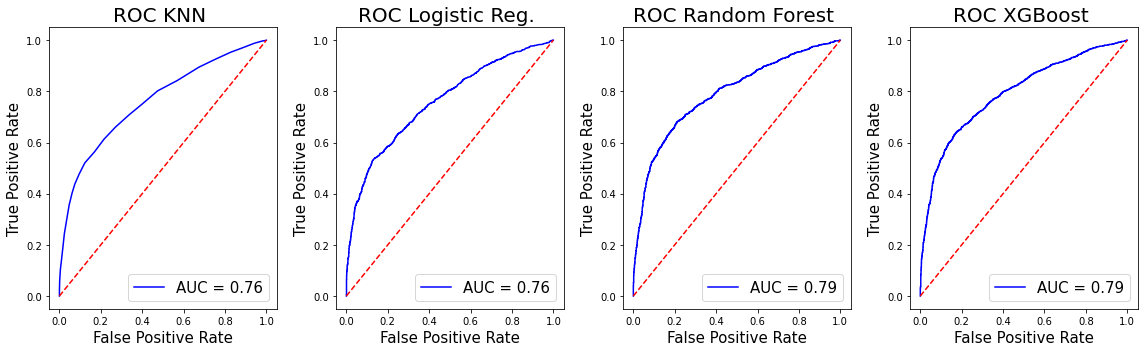

In [260]:
fig, ax_arr = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 5))


#KNN----------------------
probs = knn_model.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC KNN ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 15})

#LOGMODEL
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test,preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC Logistic Reg. ',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 15})

#RANDOM FOREST --------------------
probs = rfc_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Random Forest ',fontsize=20)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2].legend(loc = 'lower right', prop={'size': 15})

#XGBOOST ---------------------
probs = xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[3].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[3].plot([0, 1], [0, 1],'r--')
ax_arr[3].set_title('ROC XGBoost ',fontsize=20)
ax_arr[3].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[3].legend(loc = 'lower right', prop={'size': 15})

#plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

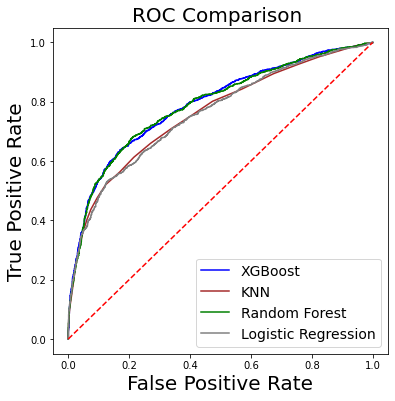

In [274]:
#ALL PLOTS ----------------------------------
fig = plt.figure(figsize=(6,6))
plt.plot(fprdtree, tprdtree, 'b', label = 'XGBoost', color='blue')
plt.plot(fprknn, tprknn, 'b', label = 'KNN', color='brown')
plt.plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
plt.plot(fprlog, tprlog, 'b', label = 'Logistic Regression', color='grey')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Comparison ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.legend(loc = 'lower right', prop={'size': 14})